Right now, with so many issues there are with buying homes and property, this can affect businesses as well. Any business that wants to buy a home and rezone it (which has been the case for cafes, etc), or for companies that buy homes to rent them out, or just for people who want to buy a home so that they can work from home in their own business with plenty of space. The increase of homes available affects everyone. Here we will be looking at the changes in the housing market, and seeing if we can find out what the best course of action is and if things will change in the future. The first dataset found is from the redfin website and goes over the housing sales prices, listing numbers, etc over the last decade. More data will probably be needed to get the full scope of what is currently happening on the marketplace. Overall analysis of the data collected shows that prices of homes have increased at an alarming rate over the last decade, but also that the number of homes available has hugely decreased. Maybe if we can look into if this is due to a population issue, or too many rental properties are on the market, or the number of total homes available, or even new construction, we can find out the main cause and how long it might take to correct this. But as long as their aren't very many homes, they'll continue to get bought up quickly, at prices way above asking, causing even fewer people and business the ability to buy homes. 

In [56]:
#importing packages
#is it okay to have all of my imports up here? When I look up examples, people tend to add imports in as they go but I like how they look together
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error

In [2]:
#adding excel file to dataframe
df = pd.read_excel('redfin.xlsx')

In [3]:
#checking columns for data
df.head()

Region Month of Period End  Median Sale Price  Median Sale Price MoM   \
0   National       February 2012           159702.0                0.004093   
1        NaN          March 2012           170636.0                0.068467   
2        NaN          April 2012           177838.0                0.042203   
3        NaN            May 2012           186118.0                0.046562   
4        NaN           June 2012           193679.0                0.040623   

   Median Sale Price YoY   Homes Sold  Homes Sold MoM   Homes Sold YoY   \
0               -0.015873      302265         0.103003         0.135593   
1                0.041521      390571         0.292149         0.066078   
2                0.061745      401238         0.027310         0.080962   
3                0.084780      460225         0.147012         0.163165   
4                0.074389      483669         0.050941         0.095785   

   New Listings  New Listings MoM   New Listings YoY   Inventory  \
0        511432           0.072786           0.056927    2078653   
1        619410           0.211129          -0.048635    2119417   
2        604699          -0.023749          -0.021595    2155676   
3        606793           0.003463           0.000391    2164369   
4        573030          -0.055643          -0.029948    2147108   

   Inventory MoM    Inventory YoY   Days on Market  Days on Market MoM  \
0        0.011585        -0.164505              98                   1   
1        0.019611        -0.165627              93                  -4   
2        0.017108        -0.166588              81                 -12   
3        0.004033        -0.171791              73                  -8   
4       -0.007975        -0.174069              68                  -4   

   Days on Market YoY  Average Sale To List  Average Sale To List MoM   \
0                 -10              0.958053                   0.001865   
1                 -13              0.961746                   0.003693   
2                 -17              0.965165                   0.003418   
3                 -17              0.968508                   0.003343   
4                 -15              0.970363                   0.001856   

   Average Sale To List YoY   
0                   0.003026  
1                   0.005927  
2                   0.007132  
3                   0.009659  
4                   0.010254

MILESTONE 2: Deal with missing data (do not just drop rows or columns without justifying this) //// MILESTONE 2: Drop any features that are not useful for your model building and explain why they are not useful

For this project we're doing an overall comparsion between two different years and the cost,inventory, etc. Below we see that the only null value is in the region column. This column is not needed for analysis since we're looking at the US as a whole and not on a region by region basis. If we do look at differing regions later on, we can look at the original data and create a new dataset based on region. So, for now, we'll just remove this column all together. There doesn't appear to be any other missing data that needs to be removed. 

In [4]:
#this checks for null values and data type for every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region                     7 non-null      object 
 1   Month of Period End        952 non-null    object 
 2   Median Sale Price          952 non-null    float64
 3   Median Sale Price MoM      952 non-null    float64
 4   Median Sale Price YoY      952 non-null    float64
 5   Homes Sold                 952 non-null    int64  
 6   Homes Sold MoM             952 non-null    float64
 7   Homes Sold YoY             952 non-null    float64
 8   New Listings               952 non-null    int64  
 9   New Listings MoM           952 non-null    float64
 10  New Listings YoY           952 non-null    float64
 11  Inventory                  952 non-null    int64  
 12  Inventory MoM              952 non-null    float64
 13   Inventory YoY             952 non-null    float64

In [5]:
#dropped column and confirmed removed
df = df.drop(['Region'], axis = 1)
df.head()

Month of Period End  Median Sale Price  Median Sale Price MoM   \
0       February 2012           159702.0                0.004093   
1          March 2012           170636.0                0.068467   
2          April 2012           177838.0                0.042203   
3            May 2012           186118.0                0.046562   
4           June 2012           193679.0                0.040623   

   Median Sale Price YoY   Homes Sold  Homes Sold MoM   Homes Sold YoY   \
0               -0.015873      302265         0.103003         0.135593   
1                0.041521      390571         0.292149         0.066078   
2                0.061745      401238         0.027310         0.080962   
3                0.084780      460225         0.147012         0.163165   
4                0.074389      483669         0.050941         0.095785   

   New Listings  New Listings MoM   New Listings YoY   Inventory  \
0        511432           0.072786           0.056927    2078653   
1        619410           0.211129          -0.048635    2119417   
2        604699          -0.023749          -0.021595    2155676   
3        606793           0.003463           0.000391    2164369   
4        573030          -0.055643          -0.029948    2147108   

   Inventory MoM    Inventory YoY   Days on Market  Days on Market MoM  \
0        0.011585        -0.164505              98                   1   
1        0.019611        -0.165627              93                  -4   
2        0.017108        -0.166588              81                 -12   
3        0.004033        -0.171791              73                  -8   
4       -0.007975        -0.174069              68                  -4   

   Days on Market YoY  Average Sale To List  Average Sale To List MoM   \
0                 -10              0.958053                   0.001865   
1                 -13              0.961746                   0.003693   
2                 -17              0.965165                   0.003418   
3                 -17              0.968508                   0.003343   
4                 -15              0.970363                   0.001856   

   Average Sale To List YoY   
0                   0.003026  
1                   0.005927  
2                   0.007132  
3                   0.009659  
4                   0.010254

In [6]:
#looking to see if there are any other nan values after the region column has been removed 
df.isna().sum()

Month of Period End          0
Median Sale Price            0
Median Sale Price MoM        0
Median Sale Price YoY        0
Homes Sold                   0
Homes Sold MoM               0
Homes Sold YoY               0
New Listings                 0
New Listings MoM             0
New Listings YoY             0
Inventory                    0
Inventory MoM                0
 Inventory YoY               0
Days on Market               0
Days on Market MoM           0
Days on Market YoY           0
Average Sale To List         0
Average Sale To List MoM     0
Average Sale To List YoY     0
dtype: int64

In [7]:
df.describe()

Median Sale Price  Median Sale Price MoM   Median Sale Price YoY   \
count         952.000000              952.000000              952.000000   
mean       384802.918592                0.007346                0.071667   
std        171811.281983                0.037502                0.058457   
min        134900.000000               -0.127907               -0.102993   
25%        245000.000000               -0.017702                0.034151   
50%        360000.000000                0.005935                0.067125   
75%        495000.000000                0.030113                0.102041   
max        900000.000000                0.164384                0.318182   

          Homes Sold  Homes Sold MoM   Homes Sold YoY    New Listings  \
count     952.000000       952.000000       952.000000     952.000000   
mean    75385.197479         0.019980         0.025403   89740.264706   
std    177001.187013         0.183972         0.180522  211514.739687   
min       976.000000        -0.406525        -0.570652    1008.000000   
25%      3544.500000        -0.099661        -0.056112    3803.500000   
50%      5261.500000         0.004021         0.023942    6427.000000   
75%      7493.500000         0.125510         0.114411    9432.750000   
max    726335.000000         0.638510         1.287523  830476.000000   

       New Listings MoM   New Listings YoY      Inventory  Inventory MoM   \
count         952.000000         952.000000  9.520000e+02      952.000000   
mean            0.035132          -0.000441  2.295657e+05       -0.001737   
std             0.282590           0.177945  5.521919e+05        0.096924   
min            -0.596477          -0.701775  1.094000e+03       -0.387886   
25%            -0.127610          -0.068810  7.816250e+03       -0.045849   
50%            -0.024909           0.000243  1.333550e+04        0.003535   
75%             0.140014           0.064300  2.352225e+04        0.043716   
max             1.417223           2.586310  2.164369e+06        0.484539   

        Inventory YoY   Days on Market  Days on Market MoM  \
count       952.000000      952.000000          952.000000   
mean         -0.053273       38.879202           -0.442227   
std           0.241465       21.525890            6.959310   
min          -0.603497        5.000000          -50.000000   
25%          -0.177437       23.000000           -3.000000   
50%          -0.079596       36.000000            1.000000   
75%           0.035054       50.000000            4.000000   
max           2.209324      145.000000           19.000000   

       Days on Market YoY  Average Sale To List  Average Sale To List MoM   \
count           952.00000            952.000000                 952.000000   
mean             -3.95063              0.989600                   0.000375   
std              13.39612              0.022640                   0.005123   
min             -70.00000              0.920697                  -0.040628   
25%             -10.00000              0.975198                  -0.002142   
50%              -3.00000              0.989319                  -0.000323   
75%               3.00000              1.000566                   0.003065   
max              43.00000              1.106325                   0.036878   

       Average Sale To List YoY   
count                 952.000000  
mean                    0.003141  
std                     0.014862  
min                    -0.106231  
25%                    -0.000836  
50%                     0.003535  
75%                     0.009733  
max                     0.071795

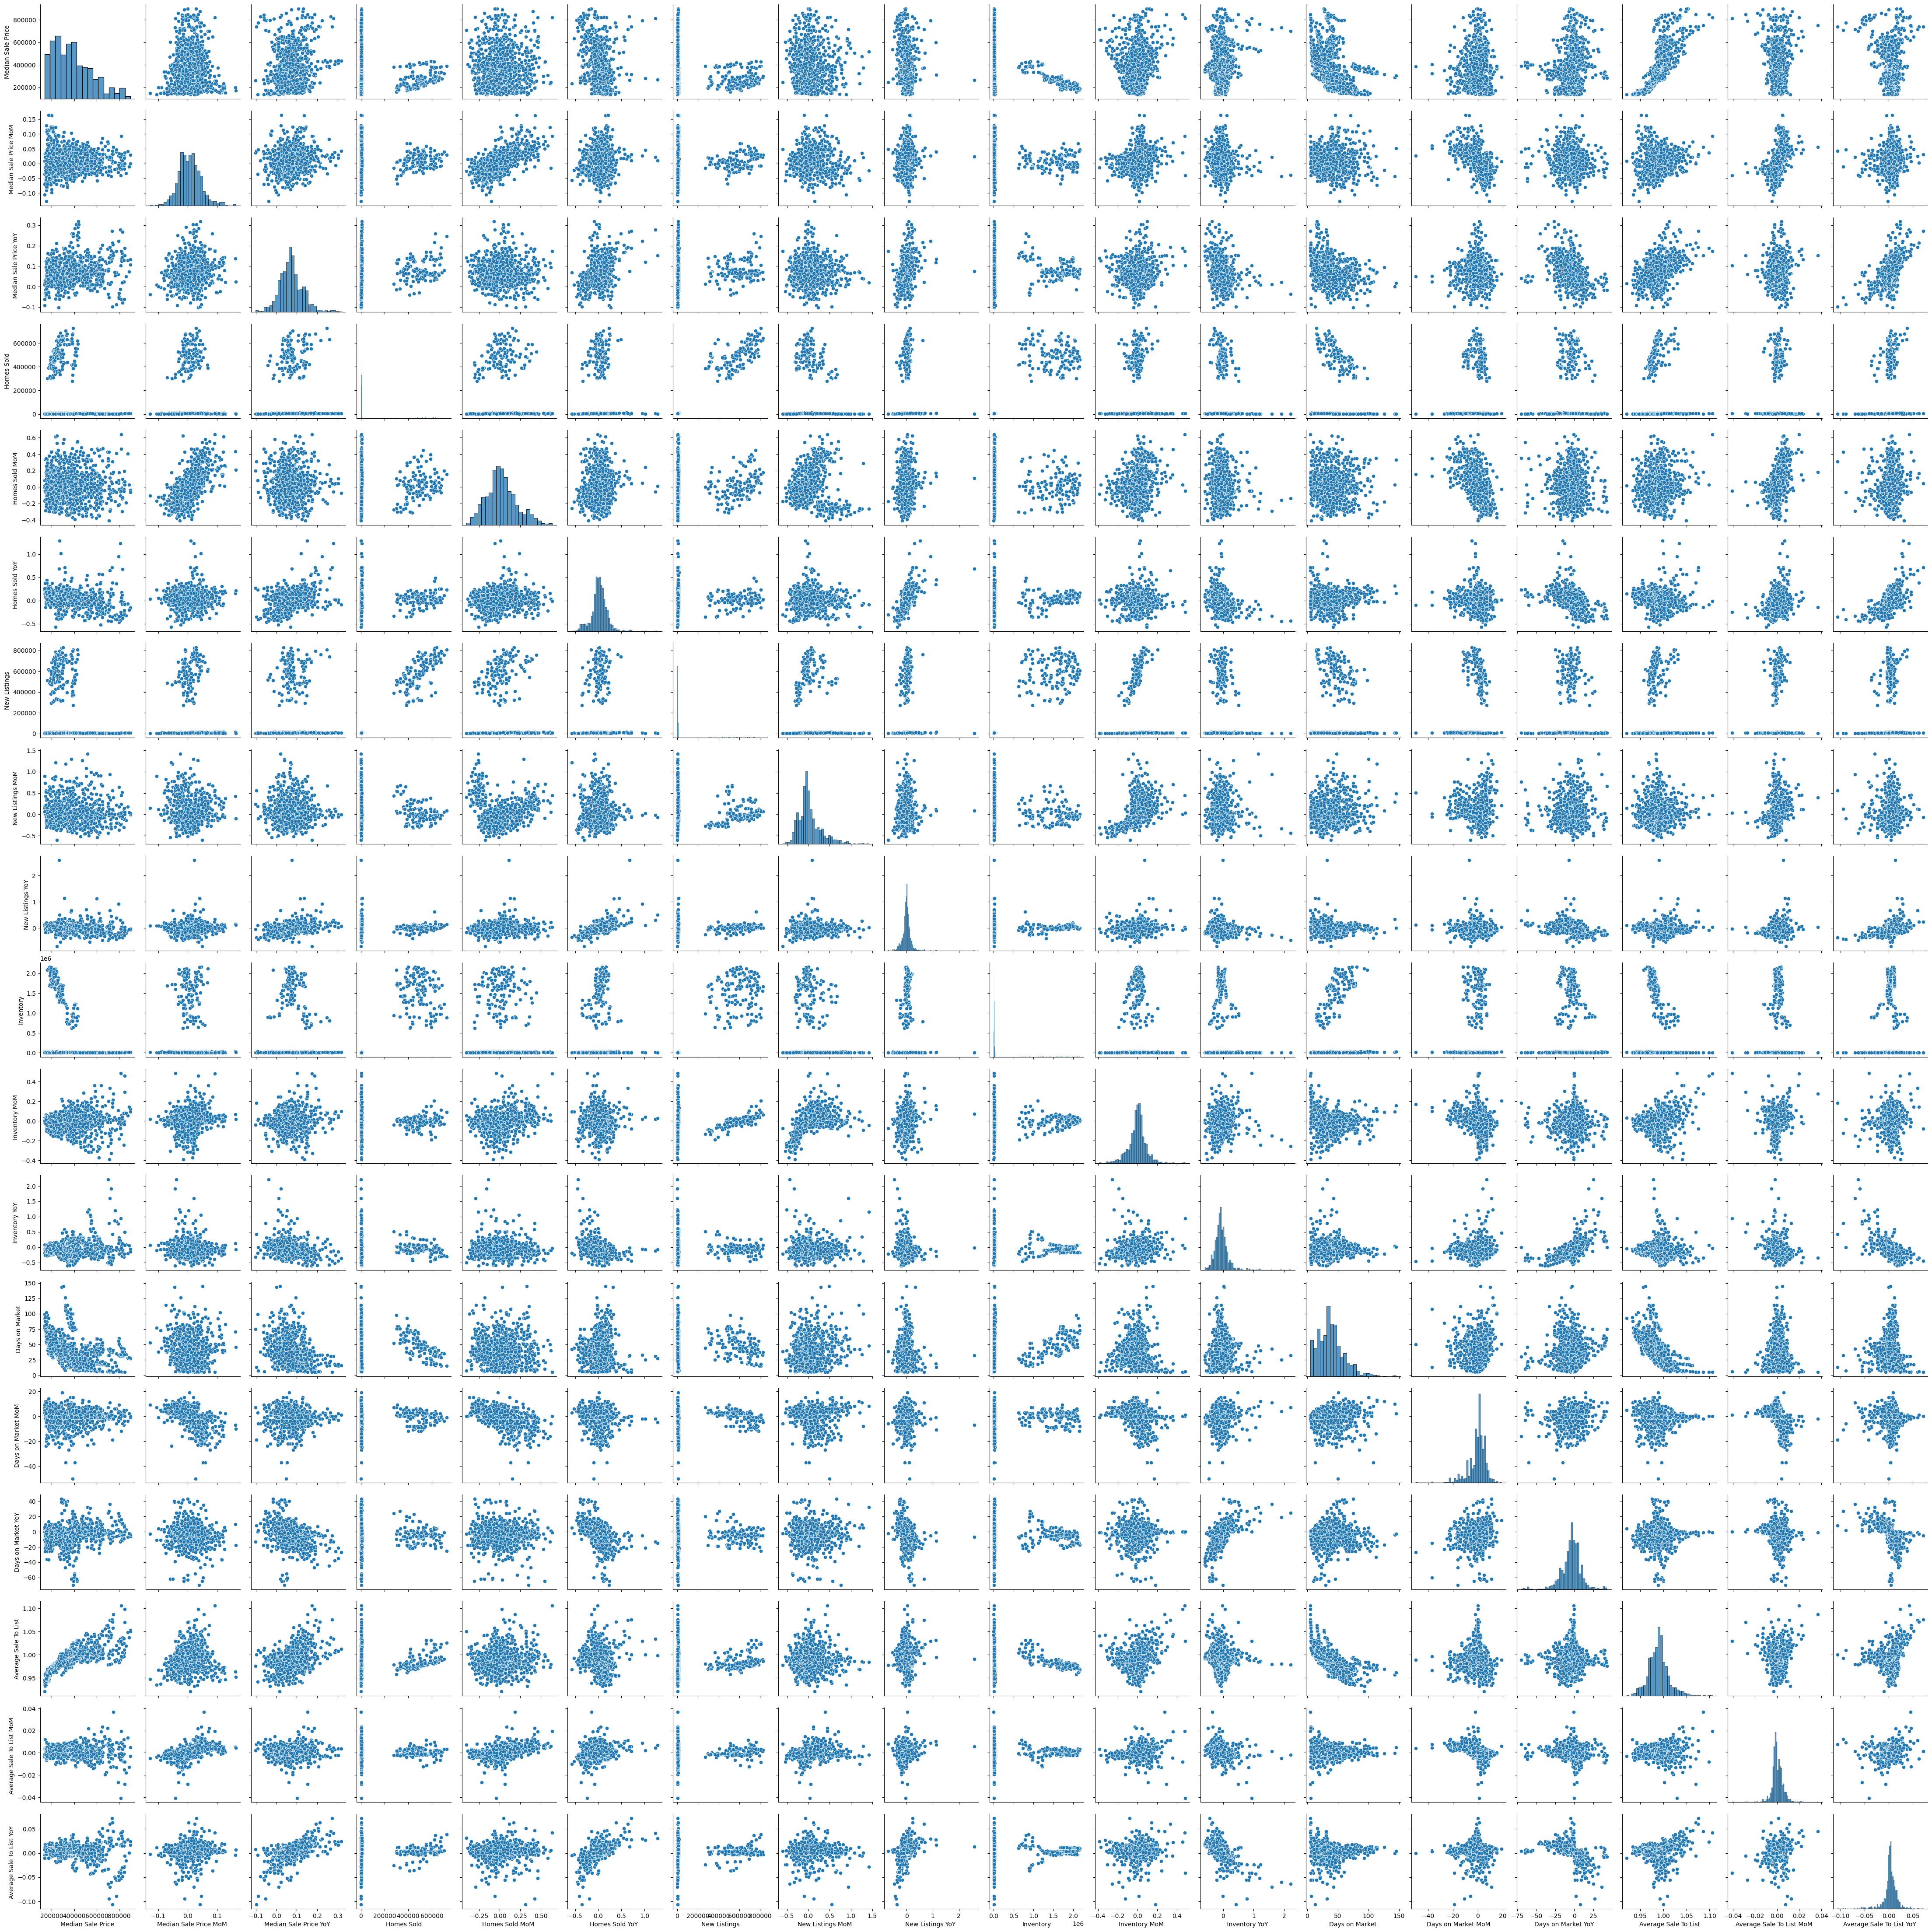

In [8]:
#MILSTONE1:
#pairplot of all numeric variables
sns.pairplot(df)
plt.show()

MILESTONE 2: Transform features if necessary.
    The below data is going to be working on the End of Month data. I'm running a train/test on the data but this needs to be numerical. Since the month/year are very important for determining how much a house is worth, it needs to be included into the data. The current column has month and year included which makes it difficult to get a dummy column. So, first we made a list of all strings to remove and went through the column to remove all of the month names. Then, we created a dummy column to replace it by, which basically turned every year into a specific number. This way the the year data can be used for the train/test and it should still be pretty accurate since we're looking at data over such a large time period. 

In [9]:
#copying the data that I want to change to make sure it doesn't affect the other data
df2= df[['Month of Period End']].copy()

In [10]:
#renaming this column to something easier
df2.rename(columns={'Month of Period End': 'year'}, inplace=True)

In [11]:
#a list of values to remove
df_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [12]:
#removing all words from list from the column
df2['year'] = df2['year'].apply(lambda x: ' '.join([word for word in x.split() if word not in (df_names)]))

In [13]:
#verifying that only years are left
df2

year
0    2012
1    2012
2    2012
3    2012
4    2012
..    ...
947  2023
948  2023
949  2023
950  2023
951  2023

[952 rows x 1 columns]

MILESTONE 2: Create dummy variables if necessary ///// MILESTONE 2: Engineer new useful features???
    The below code is changing all years to dummy variables
######## was this necessary or should I just changed the years from a string to an integar? Even though it's not really an integar? I don't think date will go through the test/train data. 

In [14]:
#labeling
df2['year'] =  label_encoder.fit_transform(df2['year'])

In [15]:
#each year will now be labeled with a different number. 
df2['year'] = LabelEncoder().fit_transform(df2['year'])

In [16]:
df2

year
0       0
1       0
2       0
3       0
4       0
..    ...
947    11
948    11
949    11
950    11
951    11

[952 rows x 1 columns]

In [17]:
#adding on the year column to the original data for future use
df['year'] = df2['year']

In [18]:
#creating a copy of the dataframe to run this data on, so it doesn't affect other things being run on the main dataframe. 
df3= df.copy()

In [19]:
#removing the month to year column since it's a string and unneeded for the following data transformation
df3 = df3.drop(['Month of Period End'], axis = 1)

In [20]:
#confirming that the year column is added at the end and the month of period column is removed
df3

Median Sale Price  Median Sale Price MoM   Median Sale Price YoY   \
0             159702.0                0.004093               -0.015873   
1             170636.0                0.068467                0.041521   
2             177838.0                0.042203                0.061745   
3             186118.0                0.046562                0.084780   
4             193679.0                0.040623                0.074389   
..                 ...                     ...                     ...   
947           475000.0               -0.030612                0.003168   
948           505000.0                0.063158                0.018145   
949           520000.0                0.029703               -0.009524   
950           541000.0                0.040385               -0.016364   
951           560000.0                0.035120                0.010055   

     Homes Sold  Homes Sold MoM   Homes Sold YoY   New Listings  \
0        302265         0.103003         0.135593        511432   
1        390571         0.292149         0.066078        619410   
2        401238         0.027310         0.080962        604699   
3        460225         0.147012         0.163165        606793   
4        483669         0.050941         0.095785        573030   
..          ...              ...              ...           ...   
947        2876        -0.260478        -0.345322          3653   
948        3547         0.233310        -0.263038          4007   
949        4640         0.308148        -0.302780          6328   
950        4650         0.002155        -0.329971          5864   
951        5624         0.209462        -0.258732          6158   

     New Listings MoM   New Listings YoY   Inventory  Inventory MoM   \
0             0.072786           0.056927    2078653        0.011585   
1             0.211129          -0.048635    2119417        0.019611   
2            -0.023749          -0.021595    2155676        0.017108   
3             0.003463           0.000391    2164369        0.004033   
4            -0.055643          -0.029948    2147108       -0.007975   
..                 ...                ...        ...             ...   
947           0.574569          -0.189483       7704       -0.056461   
948           0.096907          -0.344404       7238       -0.060488   
949           0.579236          -0.261093       8018        0.107765   
950          -0.073325          -0.361359       8218        0.024944   
951           0.050136          -0.293159       7908       -0.037722   

      Inventory YoY   Days on Market  Days on Market MoM  Days on Market YoY  \
0          -0.164505              98                   1                 -10   
1          -0.165627              93                  -4                 -13   
2          -0.166588              81                 -12                 -17   
3          -0.171791              73                  -8                 -17   
4          -0.174069              68                  -4                 -15   
..               ...             ...                 ...                 ...   
947         0.229492              59                  13                  21   
948         0.130408              46                 -13                  18   
949         0.080884              32                 -14                  17   
950        -0.071517              27                  -5                  16   
951        -0.198541              23                  -4                  11   

     Average Sale To List  Average Sale To List MoM   \
0                0.958053                   0.001865   
1                0.961746                   0.003693   
2                0.965165                   0.003418   
3                0.968508                   0.003343   
4                0.970363                   0.001856   
..                    ...                        ...   
947              0.987369                  -0.001651   
948              0.995894            

In [21]:
#setting the target and feature variables
x = df3.drop(['Median Sale Price'], axis = 1)
y = df3['Median Sale Price']

In [22]:
#train/test split with 30/70 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
#ran linear regression and predict
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(x_train, y_train)
pred = lin_reg.predict(x_test)

In [24]:
#rmse value
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE:', rmse)

RMSE: 74906.59276440761


In [25]:
#report out r2-value
#r2-value is above 75% so this is a good sign! 
r2 = r2_score(y_test, pred)
print('R2:',r2)

R2: 0.8096704352937262


In [37]:
#use PCA to reduce the dimensality of the data to improve data visualization
standard = StandardScaler()
pca = PCA(n_components=0.9, whiten=True)
features = standard.fit_transform(x_train)
x_train_pca = pca.fit_transform(features)

In [39]:
#number of features in pca transformed matrix
print(x_train_pca.shape[1])

10


MILESTONE 2: Perform any data extraction/selection steps.
    This is a huge dataset. It has summarized it's findings on a month by month basis. Since I want to see the total change, in my below graphs, I'm taking the very first year that we have data for (which is 2012), and comparing it to the most recent housing data (which is 2023). Comparing these two years should help with seeing the huge change that's happened during this time. On a side note, the data starts on Feb of 2012 and ends on May of 2023, so the 12 months pulled are not all in a specific calendar year. 

In [26]:
#reducing data to first 12 and last 12 of data to see the biggest changes
df1 = df.iloc[np.r_[0:12, -12:0]]

In [27]:
df1.head()

Month of Period End  Median Sale Price  Median Sale Price MoM   \
0       February 2012           159702.0                0.004093   
1          March 2012           170636.0                0.068467   
2          April 2012           177838.0                0.042203   
3            May 2012           186118.0                0.046562   
4           June 2012           193679.0                0.040623   

   Median Sale Price YoY   Homes Sold  Homes Sold MoM   Homes Sold YoY   \
0               -0.015873      302265         0.103003         0.135593   
1                0.041521      390571         0.292149         0.066078   
2                0.061745      401238         0.027310         0.080962   
3                0.084780      460225         0.147012         0.163165   
4                0.074389      483669         0.050941         0.095785   

   New Listings  New Listings MoM   New Listings YoY   Inventory  \
0        511432           0.072786           0.056927    2078653   
1        619410           0.211129          -0.048635    2119417   
2        604699          -0.023749          -0.021595    2155676   
3        606793           0.003463           0.000391    2164369   
4        573030          -0.055643          -0.029948    2147108   

   Inventory MoM    Inventory YoY   Days on Market  Days on Market MoM  \
0        0.011585        -0.164505              98                   1   
1        0.019611        -0.165627              93                  -4   
2        0.017108        -0.166588              81                 -12   
3        0.004033        -0.171791              73                  -8   
4       -0.007975        -0.174069              68                  -4   

   Days on Market YoY  Average Sale To List  Average Sale To List MoM   \
0                 -10              0.958053                   0.001865   
1                 -13              0.961746                   0.003693   
2                 -17              0.965165                   0.003418   
3                 -17              0.968508                   0.003343   
4                 -15              0.970363                   0.001856   

   Average Sale To List YoY   year  
0                   0.003026     0  
1                   0.005927     0  
2                   0.007132     0  
3                   0.009659     0  
4                   0.010254     0

MILSTONE1: The below plot figure is based on the Median Sale price from 2012 into 2023. You can see that the price has risen from 150000 to 550000, more than tripling within the decade. 

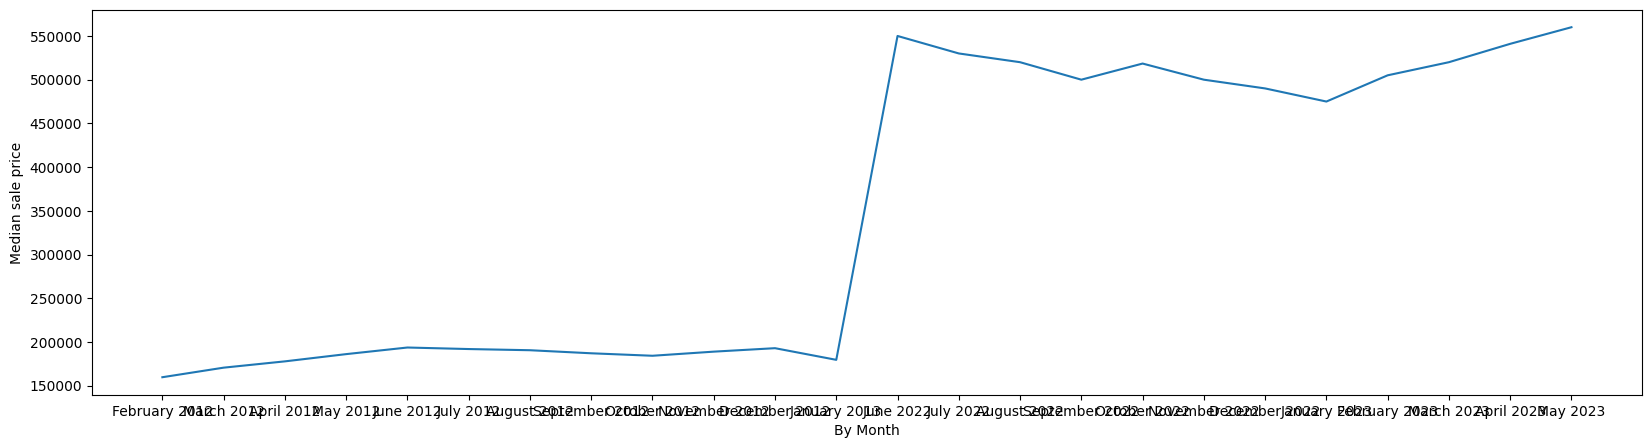

In [28]:
#line graph
plt.figure(figsize=(20,5))
plt.plot(df1['Month of Period End'], df1['Median Sale Price'])
plt.ylabel('Median sale price')
plt.xlabel('By Month')
plt.show()

MILSTONE1:The next graph we want to look at the number of homes sold. So, in 2012, homes sold were anywhere between 300000 and 500000, with most looking around 400000. While, in 2023 we are seeing less than 100000 homes sold each month. Looking at the previous graph along with this one. This shows that, the biggest cause of the rise in home prices, is due to the lack of homes on the market, which has drastically changed in the last decade. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


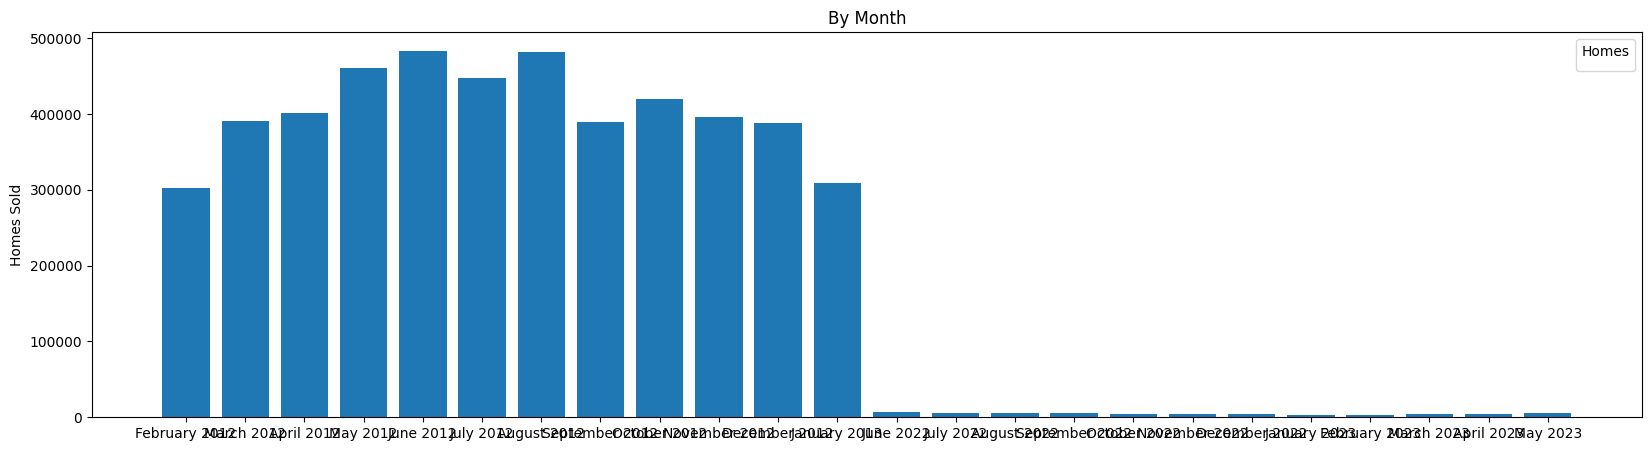

In [29]:
#bar graph
fig, ax = plt.subplots(figsize=(20,5) )
ax.bar(df1['Month of Period End'], df1['Homes Sold'])

ax.set_ylabel('Homes Sold')
ax.set_title('By Month')
ax.legend(title='Homes')

plt.show()

MILSTONE1:This next graph is comparing the sale to list ratio with the inventory. Inventory is the total number of active listings plus pending sales. The sale to list ratio is the amount that the house is sold for compared to the asking price. So, we can see that when the inventory is low, people offer way above the asking price, versus when the inventory is high. 

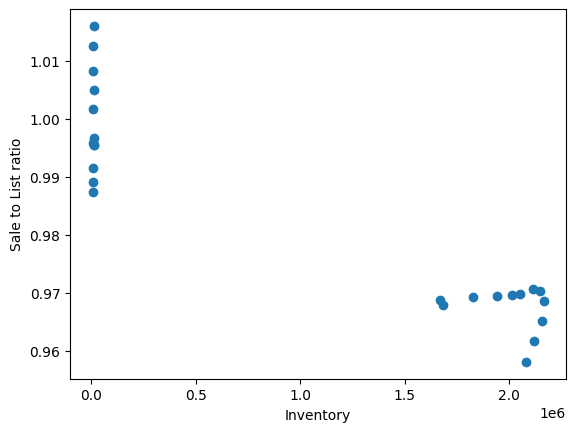

In [30]:
#scatter plot comparing inventory to sale to list ratio
fig, ax = plt.subplots()

ax.scatter(df1['Inventory'], df1['Average Sale To List'])
ax.set_ylabel('Sale to List ratio')
ax.set_xlabel('Inventory')
plt.show()

MILSTONE1: This graph I decided to do see if there was a correlation between the number of days that a house was on the market versus how many new listings that there were. We can see that the fewer new listings that there are the market, then the fewer days that most homes will be on the market. 

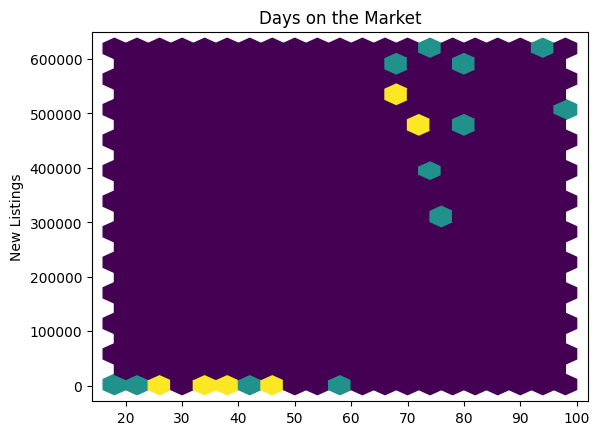

In [31]:
fig, ax = plt.subplots()
ax.hexbin(df1['Days on Market'], df1['New Listings'], gridsize=20)
ax.set_ylabel('New Listings')
ax.set_title('Days on the Market')
plt.show()